# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}{city}&appid={weather_api_key}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | radzymin
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | anibare
City not found. Skipping...
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | samana
Processing Record 18 of Set 1 | garoua boulai
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | nova vicosa
Processing Record 21 of Set 1 | sangin
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
#city_data_df["Date"] = [time.localtime(dates) for dates in city_data_df["Date"]]
#formatted_time = time.strftime("%Y-%m-%d %H:%M:%S", city_data_df["Date"])

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,290.87,64,100,2.71,PT,1698624831
1,grytviken,-54.2811,-36.5092,277.65,99,100,2.93,GS,1698624950
2,adamstown,-25.0660,-130.1015,295.53,83,95,5.18,PN,1698624950
3,bredasdorp,-34.5322,20.0403,285.85,58,0,7.58,ZA,1698624951
4,puerto ayora,-0.7393,-90.3518,297.34,89,64,3.58,EC,1698624834


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,290.87,64,100,2.71,PT,1698624831
1,grytviken,-54.2811,-36.5092,277.65,99,100,2.93,GS,1698624950
2,adamstown,-25.0660,-130.1015,295.53,83,95,5.18,PN,1698624950
3,bredasdorp,-34.5322,20.0403,285.85,58,0,7.58,ZA,1698624951
4,puerto ayora,-0.7393,-90.3518,297.34,89,64,3.58,EC,1698624834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

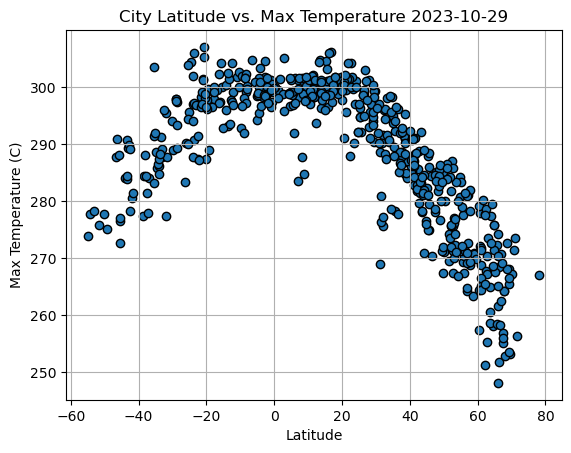

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 2023-10-29")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

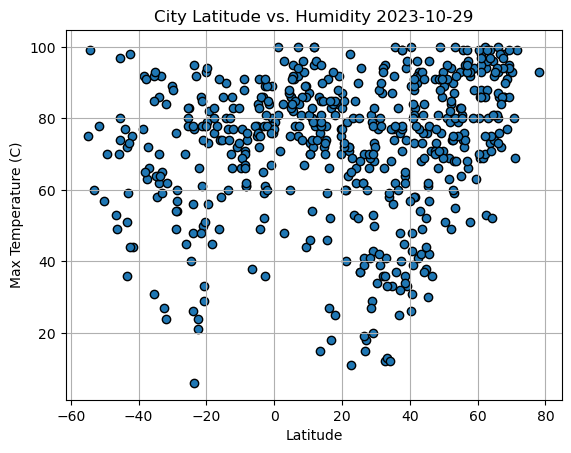

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 2023-10-29")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

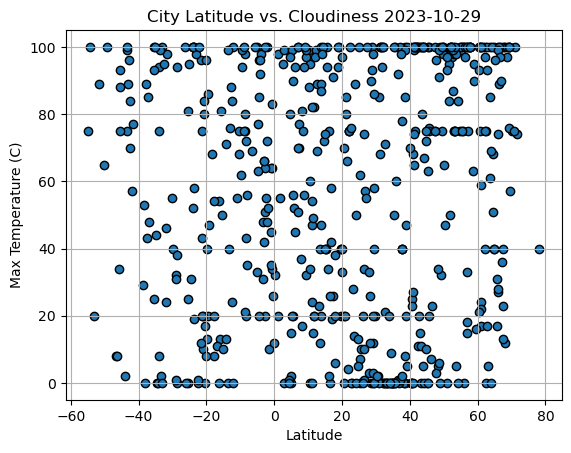

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 2023-10-29")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

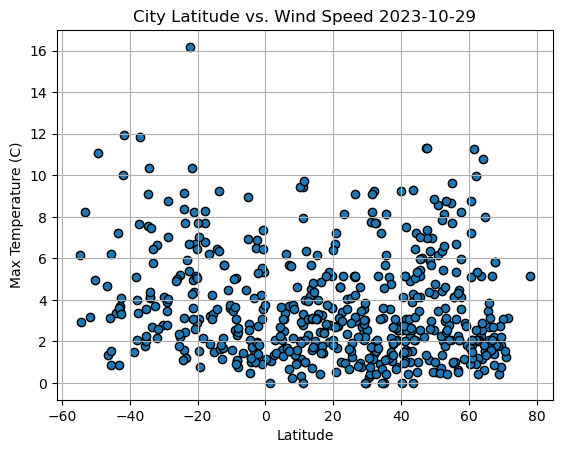

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 2023-10-29")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,290.87,64,100,2.71,PT,1698624831
6,radzymin,52.4159,21.1841,287.09,74,97,5.46,PL,1698624952
7,olonkinbyen,70.9221,-8.7187,273.50,69,100,1.27,SJ,1698624953
11,bethel,41.3712,-73.4140,282.79,88,100,3.09,US,1698624849
15,samana,19.2056,-69.3369,300.13,92,100,2.81,DO,1698624957


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,277.65,99,100,2.93,GS,1698624950
2,adamstown,-25.0660,-130.1015,295.53,83,95,5.18,PN,1698624950
3,bredasdorp,-34.5322,20.0403,285.85,58,0,7.58,ZA,1698624951
4,puerto ayora,-0.7393,-90.3518,297.34,89,64,3.58,EC,1698624834
5,blackmans bay,-43.0167,147.3167,289.22,59,89,3.72,AU,1698624833


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7780738242592281


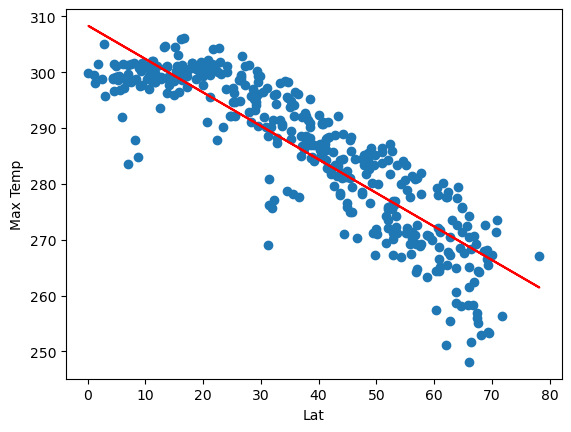

In [15]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.6109711815279082


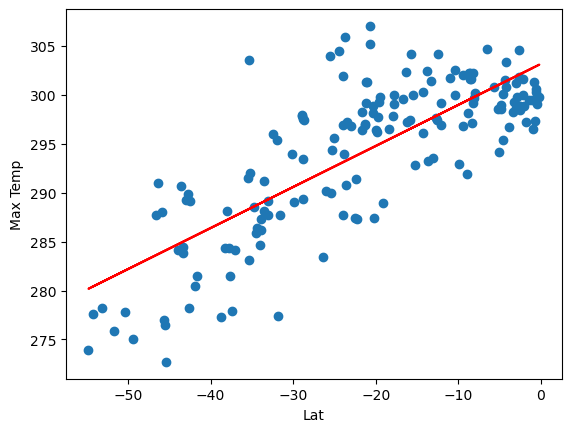

In [16]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02497324337198131


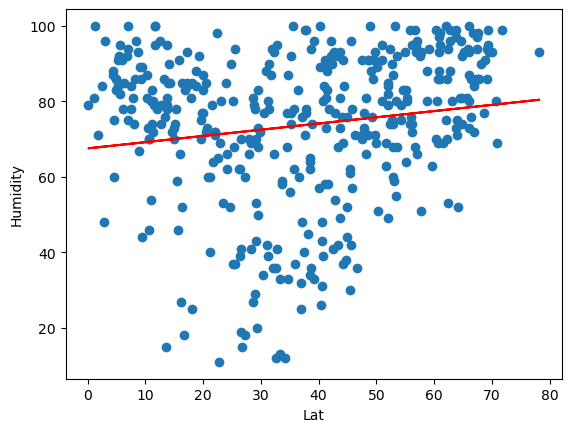

In [17]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: 0.018328531304569084


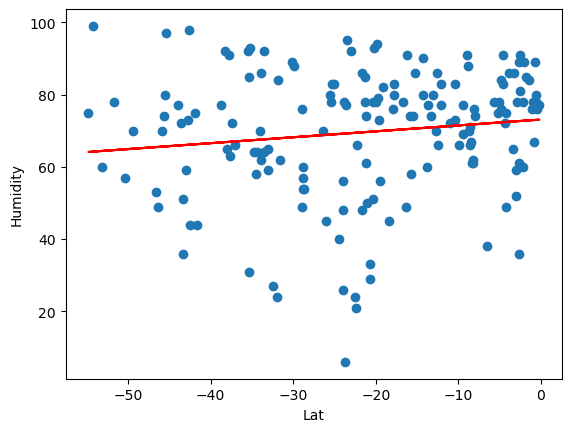

In [18]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03675146600439499


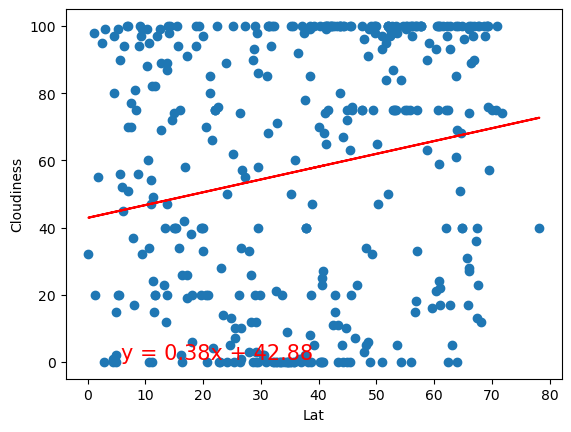

In [19]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.0005718513645643012


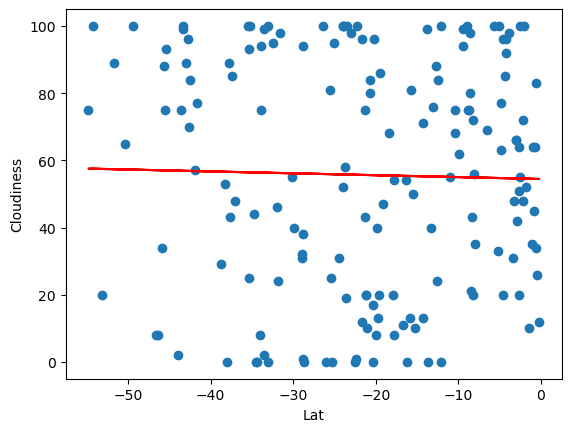

In [20]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005055119868673649


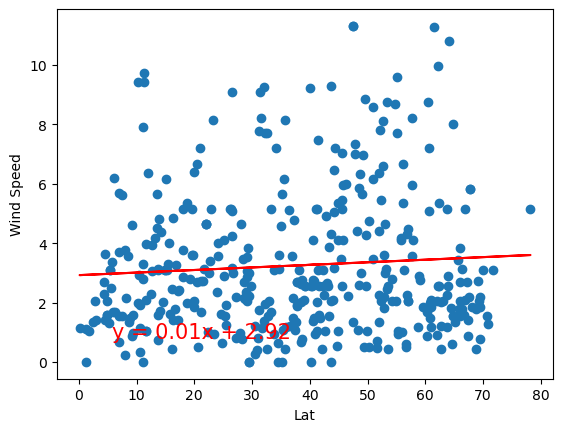

In [21]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: 0.05270303460787257


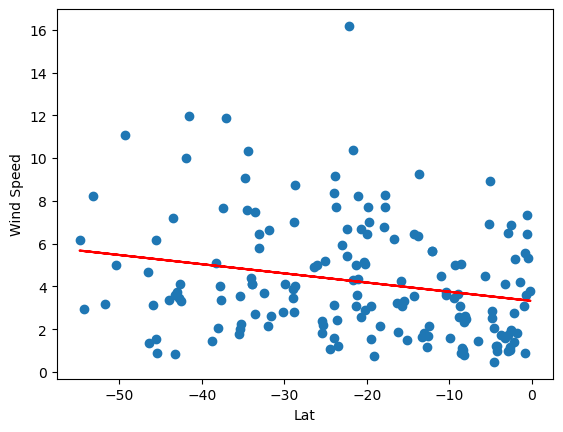

In [22]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE